# Análise exploratória de dados

In [38]:
# Importando as dependências
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Carregando os dados brutos
base_cadastral = pd.read_csv("../data/raw/base_cadastral.csv",  sep=";")
base_info = pd.read_csv("../data/raw/base_info.csv", sep=";")
base_pagamentos_desenvolvimento = pd.read_csv("../data/raw/base_pagamentos_desenvolvimento.csv", sep=";")
base_pagamentos_teste = pd.read_csv("../data/raw/base_pagamentos_teste.csv", sep=";")

### Visualizando os dados e entendendo os dados

In [40]:
base_cadastral

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62
...,...,...,...,...,...,...,...,...
1310,3431426889924624821,2020-08-13,92,NaN,Serviços,HOTMAIL,MEDIO,69
1311,5288503299611498087,2020-11-03,NaN,NaN,Comércio,YAHOO,PEQUENO,13
1312,957773253650890560,2021-07-05,NaN,NaN,Comércio,GMAIL,MEDIO,20
1313,6094038865287329652,2021-07-05,NaN,NaN,Serviços,GMAIL,GRANDE,48


In [41]:
base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0
...,...,...,...,...
24396,705648002974742140,2021-12,278663.0,105.0
24397,4993499380140734678,2021-12,156968.0,140.0
24398,4614484019183480654,2021-12,292698.0,121.0
24399,1299146298565441811,2021-12,106180.0,121.0


In [42]:
base_pagamentos_desenvolvimento

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99
...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99


In [43]:
base_pagamentos_teste

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99
...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99


### Exploração inicial das bases individualmente

In [44]:

def analise_basica(df, nome):
    resumo = {
        "nome": nome,
        "shape": df.shape,
        "tipos_de_dados": df.dtypes.to_dict(),
        "valores_nulos": df.isnull().sum().to_dict(),
        "valores_unicos": df.nunique().to_dict(),
        "exemplo_valores": df.head(3).to_dict(orient="records")
    }
    return resumo

# Aplicar análise básica em todas as bases
analises = [
    analise_basica(base_cadastral, "base_cadastral"),
    analise_basica(base_info, "base_info"),
    analise_basica(base_pagamentos_desenvolvimento, "base_pagamentos_desenvolvimento"),
    analise_basica(base_pagamentos_teste, "base_pagamentos_teste")
]


In [47]:
def plot_analises(analises):
    for analise in analises:
        nome = analise['nome']
        print(f"\nAnalisando: {nome}")
        
        # Converter dicionários em DataFrames para visualização
        df_nulos = pd.DataFrame.from_dict(analise['valores_nulos'], orient='index', columns=['valores_nulos'])
        df_unicos = pd.DataFrame.from_dict(analise['valores_unicos'], orient='index', columns=['valores_unicos'])
        df_dtypes = pd.DataFrame.from_dict({k: str(v) for k, v in analise['tipos_de_dados'].items()}, orient='index', columns=['tipo_de_dado'])

        # Juntar em um único DataFrame para exibir em tabela (se quiser)
        df_info = df_dtypes.join([df_nulos, df_unicos])

        # Gráfico de valores nulos
        plt.figure(figsize=(10, 4))
        df_nulos.sort_values('valores_nulos', ascending=False).plot(kind='bar', legend=False, color='salmon')
        plt.title(f'{nome}: Valores Nulos por Coluna')
        plt.ylabel('Qtd de valores nulos')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Gráfico de valores únicos
        plt.figure(figsize=(10, 4))
        df_unicos.sort_values('valores_unicos', ascending=False).plot(kind='bar', legend=False, color='skyblue')
        plt.title(f'{nome}: Valores Únicos por Coluna')
        plt.ylabel('Qtd de valores únicos')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # Tabela com tipos de dados, nulos e únicos
        display(df_info)



Analisando: base_cadastral


<Figure size 1000x400 with 0 Axes>

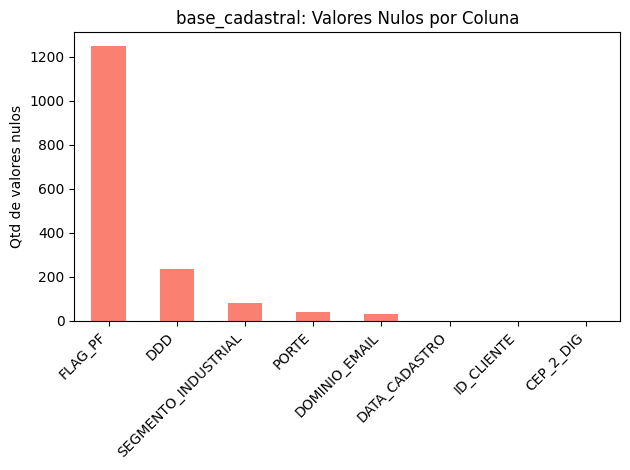

<Figure size 1000x400 with 0 Axes>

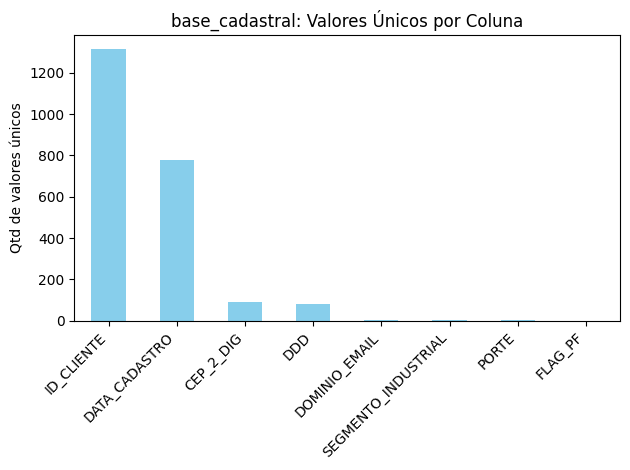

,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1315
DATA_CADASTRO,object,0,777
DDD,object,237,79
FLAG_PF,object,1249,1
SEGMENTO_INDUSTRIAL,object,83,3
DOMINIO_EMAIL,object,30,6
PORTE,object,41,3
CEP_2_DIG,object,0,90



 Exemplos de valores:


,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48



Analisando: base_info


<Figure size 1000x400 with 0 Axes>

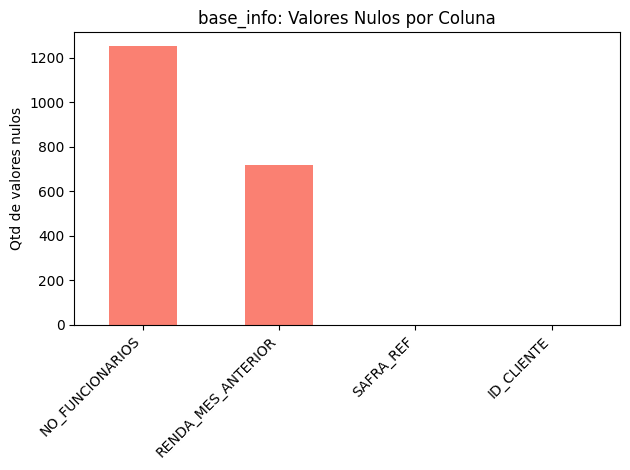

<Figure size 1000x400 with 0 Axes>

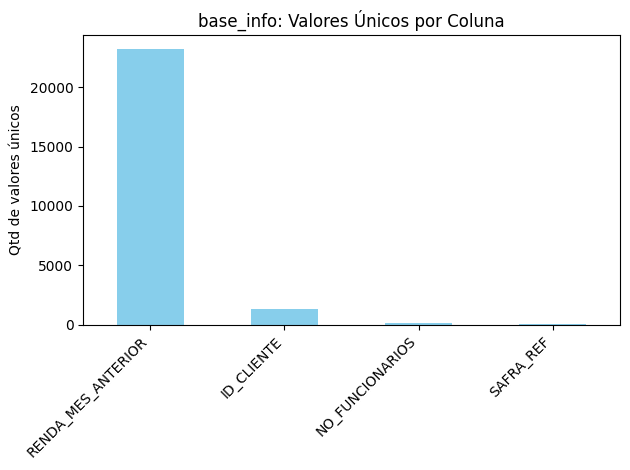

,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1336
SAFRA_REF,object,0,40
RENDA_MES_ANTERIOR,float64,717,23196
NO_FUNCIONARIOS,float64,1252,128



 Exemplos de valores:


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0



Analisando: base_pagamentos_desenvolvimento


<Figure size 1000x400 with 0 Axes>

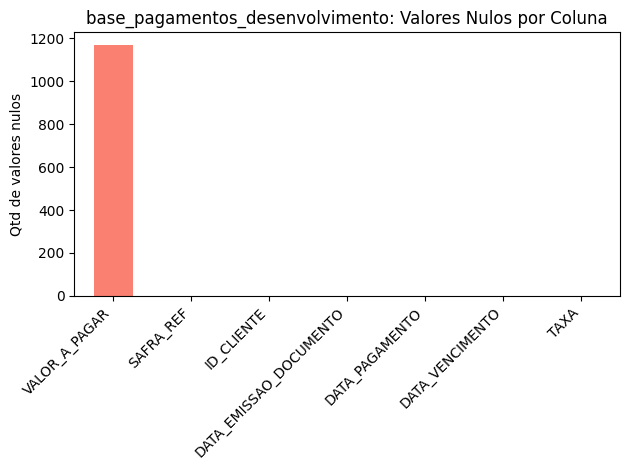

<Figure size 1000x400 with 0 Axes>

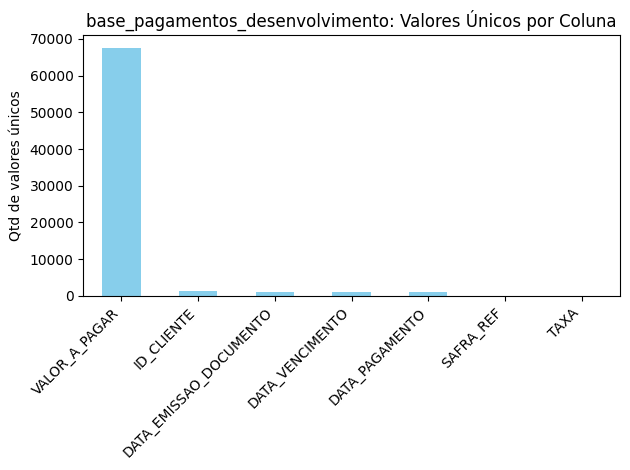

,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1248
SAFRA_REF,object,0,35
DATA_EMISSAO_DOCUMENTO,object,0,1040
DATA_PAGAMENTO,object,0,921
DATA_VENCIMENTO,object,0,955
VALOR_A_PAGAR,float64,1170,67588
TAXA,float64,0,5



 Exemplos de valores:


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99



Analisando: base_pagamentos_teste


<Figure size 1000x400 with 0 Axes>

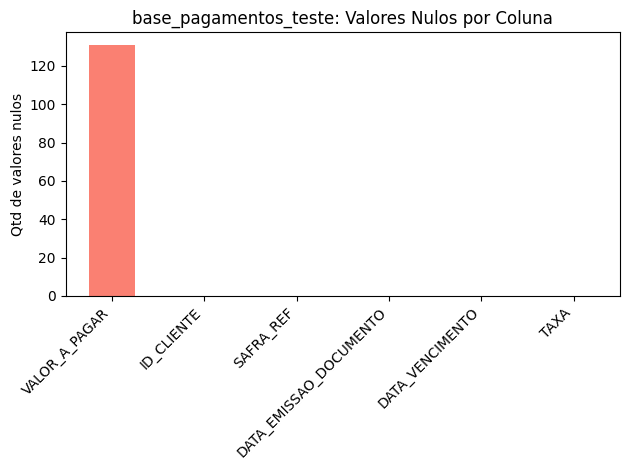

<Figure size 1000x400 with 0 Axes>

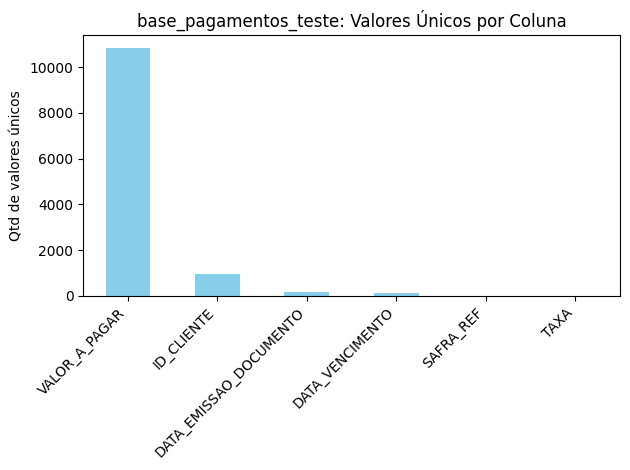

,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,976
SAFRA_REF,object,0,5
DATA_EMISSAO_DOCUMENTO,object,0,150
DATA_VENCIMENTO,object,0,141
VALOR_A_PAGAR,float64,131,10850
TAXA,float64,0,5



 Exemplos de valores:


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99


In [46]:
plot_analises(analises)